In [1]:
from random import randint
from numpy import array
from numpy import argmax
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.core import Flatten, Dense
from keras.layers.recurrent import LSTM
from keras.layers import Activation
from keras.optimizers import SGD
import numpy as np
from sklearn.preprocessing import OneHotEncoder

Using TensorFlow backend.


In [2]:
#generate a sequence of random numbers in [0, n_features]
def generate_sequence(length, n_features):
    return [randint(0, n_features-1) for _ in range(length)]

In [3]:
#one hot encode sequence
def one_hot_encode(sequence, n_features):
    encoding = list()
    for value in sequence:
        vector = [0 for _ in range(n_features)]
        vector[value] = 1
        encoding.append(vector)
        
    return array(encoding)

In [4]:
#decode a one hot encoded sequence
def one_hot_decode(encoded_seq):
    return [argmax(vector) for vector in encoded_seq]

In [5]:
#generate random sequence
sequence = generate_sequence(25,100)
print(sequence)

[1, 89, 55, 79, 48, 97, 62, 45, 67, 97, 59, 55, 21, 78, 53, 0, 37, 28, 98, 7, 30, 10, 39, 17, 45]


In [6]:
#one hot encode
encoded = one_hot_encode(sequence, 100)
print(encoded)

[[0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [7]:
#one hot decode
decoded = one_hot_decode(encoded)
print(decoded)

[1, 89, 55, 79, 48, 97, 62, 45, 67, 97, 59, 55, 21, 78, 53, 0, 37, 28, 98, 7, 30, 10, 39, 17, 45]


In [8]:
X = encoded.reshape(1, 25, 100)
print(X)

[[[0 1 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]


In [9]:
y = encoded[1, :]
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]


In [10]:
#generate one example for an lstm
def generate_example(length, n_features, out_index):
    #generate sequence
    sequence = generate_sequence(length, n_features)
    #one hot encode
    encoded = one_hot_encode(sequence, n_features)
    #reshape sequence to be 3D
    X = encoded.reshape((1, length, n_features))
    #select output
    y = encoded[out_index].reshape(1, n_features)
    return X,y

In [11]:
X, y = generate_example(25, 100, 2)
print(X.shape)
print(y.shape)

(1, 25, 100)
(1, 100)


In [12]:
#define model
length = 10
n_features = 20
out_index = 2
model = Sequential()
model.add(LSTM(50, input_shape=(length, n_features)))
model.add(Dense(n_features, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
print(model.summary())

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 50)                14200     
_________________________________________________________________
dense_1 (Dense)              (None, 20)                1020      
Total params: 15,220
Trainable params: 15,220
Non-trainable params: 0
_________________________________________________________________
None


In [13]:
#fit model
for i in range(10000):
    X, y = generate_example(length, n_features, out_index)
    model.fit(X, y, epochs=1, verbose=2)

Instructions for updating:
Use tf.cast instead.
Epoch 1/1
 - 11s - loss: 3.0650 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.8909 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.9450 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 3.0284 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.9574 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.9710 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 3.1096 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.9769 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 3.0359 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.9317 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.9067 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 3.0522 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 3.1013 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.9544 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.9858 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 3.0627 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.9917 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 3.0213 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 3.0139 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.97

Epoch 1/1
 - 0s - loss: 2.9101 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.7871 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.9046 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.9388 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 3.0127 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.9383 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 3.1170 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.7934 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.9182 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 3.1554 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 3.0879 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 3.1091 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 3.0394 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.9527 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.8066 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.9995 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.9607 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.9966 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.9972 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 3.0286 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.8795 -

 - 0s - loss: 2.9461 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.9947 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 3.0274 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 3.0070 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 3.0936 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.8888 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 3.0330 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.9212 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 3.1407 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 3.0868 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 3.0754 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.9474 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.7934 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 3.0196 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 3.0947 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.8059 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.7725 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 3.1364 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.9294 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.7975 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 3.0439 - acc: 

 - 0s - loss: 2.9590 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 3.1879 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 3.0517 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.9669 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.4205 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.6265 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 3.1918 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.7850 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 3.1064 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 3.2286 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.4711 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.7626 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.4652 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.3252 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.9588 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 3.0979 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.2178 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 3.0803 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 3.1176 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.7668 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 3.0336 - acc: 0.0000e+

Epoch 1/1
 - 0s - loss: 2.6348 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.9007 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.9815 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 3.0882 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 3.2816 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.9212 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.9819 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.6549 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.5771 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 3.3118 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 3.5961 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 3.5022 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.9067 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.9489 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 3.1660 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.6651 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 3.9249 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 4.0441 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.5762 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.2404 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 3.1033 -

Epoch 1/1
 - 0s - loss: 2.9239 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 3.0755 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 3.0408 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 3.2562 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 3.1240 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.9898 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.9921 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.9258 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.4044 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 3.0004 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.9226 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.8028 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 3.3761 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 3.2432 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.9883 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 3.1232 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 3.6811 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.9083 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 3.1394 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.6694 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.7972 -

Epoch 1/1
 - 0s - loss: 1.8701 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.8871 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.9889 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.4974 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 3.1466 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.9248 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.7214 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.1980 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.4780 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.8480 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 3.4259 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.2501 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.3333 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.6984 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 3.6755 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 3.2371 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 3.1076 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.9959 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.7567 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.5314 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 

Epoch 1/1
 - 0s - loss: 2.6496 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.3982 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 3.5478 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.8331 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.6103 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 3.4454 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.1755 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.3044 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.1835 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.4857 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 3.1063 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.2181 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.9864 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 3.5608 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.3305 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.8151 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.1213 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.8011 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 3.4541 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.4264 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.6576 -

 - 0s - loss: 2.3861 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 3.2572 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.2046 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.7990 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.3434 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.7233 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.8629 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 3.5165 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.3391 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.6096 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.9920 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.8690 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 3.2292 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.2415 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 3.5067 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.8355 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.6616 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.9898 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.9069 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.5662 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 3.4098 - acc: 0.00

 - 0s - loss: 1.4781 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 3.1284 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.8566 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.1337 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.7040 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.1620 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.3187 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.6500 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 3.0480 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.3811 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 3.4028 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.8391 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.6579 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 3.1629 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 3.2507 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.6902 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.8117 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.3056 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.2357 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.6547 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.4246 - acc: 0.0000e+00
Epoch 1/1

 - 0s - loss: 3.0295 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.5934 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.1646 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 3.0306 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 3.0057 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 3.1042 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.4599 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 4.0360 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.4092 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 3.9607 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 4.7497 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.8707 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.5988 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.9414 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.8481 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.4272 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.2362 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.6519 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 3.4000 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.8196 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 3.0851 - acc: 

Epoch 1/1
 - 0s - loss: 3.0776 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.6749 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 3.3069 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 3.0729 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.6217 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.4148 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.5757 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.4885 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 3.3950 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 3.7014 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.7465 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.8047 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.9511 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.6507 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.8341 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.7988 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.9894 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.3351 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.9113 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.4569 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 3.0467 - acc: 0.

Epoch 1/1
 - 0s - loss: 3.8952 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.6334 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.5868 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.7979 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.5198 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 3.5643 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.8410 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.3413 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.0936 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.6371 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.0771 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.9147 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.9964 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 3.2076 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 3.0849 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 3.0294 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.7433 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.4379 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.3435 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.1877 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.7836 -

Epoch 1/1
 - 0s - loss: 3.1028 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.1592 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.3953 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 3.0533 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.8814 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.0438 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.1167 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.9134 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.4086 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.5822 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 3.0135 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.9190 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.1185 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.8392 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.9032 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.7817 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 3.8098 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.1565 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.2502 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.8209 - acc: 0.0000e+00
Epoch 1/1
 - 0s - lo

Epoch 1/1
 - 0s - loss: 1.7813 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 3.1144 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.6185 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.2547 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.8503 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.8958 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.2539 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 3.5511 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.5218 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 3.7283 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.4284 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 3.3390 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 3.2630 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.8303 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.9320 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 3.3424 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.0429 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 3.1328 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.7483 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.0259 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.5043 -

Epoch 1/1
 - 0s - loss: 2.0574 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.4930 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.2594 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 3.2041 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 3.3379 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.1336 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.9422 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.3467 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.7472 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.7098 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.6517 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.3229 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.6853 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.6188 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.7827 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 3.7555 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.8105 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 4.0205 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.7697 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.0899 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.5139 - acc: 0.

Epoch 1/1
 - 0s - loss: 1.7225 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.5866 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.8360 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.7277 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.8339 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.6287 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.6284 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.5966 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.2779 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.0584 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.3265 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.8839 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.8602 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.5521 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.4177 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.6757 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.6405 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.8764 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 3.6212 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.0505 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 4.2916 -

Epoch 1/1
 - 0s - loss: 3.1241 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.6457 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.0297 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.7900 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.4466 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.9026 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.2005 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 4.0134 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.8002 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.9098 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 3.5288 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.4964 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.5421 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.0345 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 4.2366 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.1442 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 3.2239 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.0211 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 3.4149 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.1148 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.4212 - acc: 1.

Epoch 1/1
 - 0s - loss: 3.6655 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 3.3128 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 3.1191 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.4670 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.5632 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 4.2421 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.1385 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.0821 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.2151 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.0906 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.8876 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.6385 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.2595 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 3.1383 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.1208 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 3.1310 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 3.9405 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 3.5720 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.1124 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.6987 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 

Epoch 1/1
 - 0s - loss: 3.1163 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 4.4847 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.6825 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.7821 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 3.0526 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.0369 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.7733 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 3.2699 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 4.0480 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.2092 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.0429 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.3254 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.8828 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.2411 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.4396 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.6679 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.7511 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.4755 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.7718 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.8313 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 3.1307 - acc: 0.

Epoch 1/1
 - 0s - loss: 1.4776 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.6473 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 3.0037 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.9438 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.6347 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 3.7160 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.3850 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.2595 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.9751 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.3104 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 3.2961 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.4396 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.1555 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.9877 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.3961 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 3.1101 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.6426 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 4.1544 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.2506 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 3.8684 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.7034 -

 - 0s - loss: 3.2244 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.2427 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 3.4890 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.2919 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 3.0707 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.9637 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.8352 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 4.0812 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.1832 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.8846 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.4509 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.2518 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.9822 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 4.1076 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 3.6819 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.6902 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.5267 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.8733 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.4589 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 5.8061 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 3.7270 - acc: 0.0000e+00
E

Epoch 1/1
 - 0s - loss: 2.5040 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.1831 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 3.3155 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.8720 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.5421 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 3.8066 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 3.5829 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 3.4060 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.2371 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.6634 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 3.7636 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 3.5231 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.7905 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.1748 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.4387 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.8032 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.3929 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.8296 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.9810 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 3.1882 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.0179 - acc

Epoch 1/1
 - 0s - loss: 2.3746 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 4.1106 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 5.6515 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.2024 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 3.9062 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.3348 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 3.0511 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.7261 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.9316 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.7805 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.2083 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 3.4758 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.0332 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.8638 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.4022 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.9392 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.0118 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.4816 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.5042 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.6483 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.5258 - acc: 0.0000e+00

Epoch 1/1
 - 0s - loss: 2.0455 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 3.0750 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.7873 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.4595 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.6312 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.2528 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 3.1182 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.4863 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.9782 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.9308 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.7194 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.8703 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.6597 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.5368 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.8126 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 3.2764 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.4393 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.2340 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 3.1079 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.8750 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.4493 - acc: 0.0000

Epoch 1/1
 - 0s - loss: 2.1763 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 3.0823 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.5388 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.5079 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.9121 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 4.4464 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.3618 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.7395 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.7961 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.8186 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.5857 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.4089 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.5875 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 3.7544 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 3.1516 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.6263 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.8793 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.8399 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.2286 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.3205 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.9733 -

 - 0s - loss: 3.5742 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.7035 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 3.1294 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 3.0161 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 3.4120 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 3.7587 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 3.4088 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.4346 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.5416 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 3.1804 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.9319 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.8059 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.6193 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.0863 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.6157 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.9391 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.4605 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.6028 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.8873 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.0026 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.5120 - acc: 

 - 0s - loss: 1.4916 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.0881 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.5900 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.8367 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.5428 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.5643 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.2585 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.2185 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 4.0005 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.6873 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.2205 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.1915 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.4098 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.3215 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.3671 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.2240 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.7896 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.2823 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 3.4069 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.6987 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.3031 - acc: 0.0000e+00
Epoch

Epoch 1/1
 - 0s - loss: 2.0866 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.2988 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.3555 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.6398 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.8119 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.6995 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.3505 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 4.2174 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 3.3491 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 3.5852 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.8650 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.9151 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.3950 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.1155 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.2227 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.6996 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.1891 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.3779 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 3.0932 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.5209 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.2017 - acc: 0.0000

Epoch 1/1
 - 0s - loss: 1.2973 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.7991 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.3421 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.2346 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.3593 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.9084 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.5602 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.3984 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.0341 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.3612 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.2191 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 3.0403 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.2817 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.1712 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.3353 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.9654 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.6011 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.4375 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.2109 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 3.0894 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.8611 - acc: 0.0000e+00
Epo

Epoch 1/1
 - 0s - loss: 0.6808 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 3.1300 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.5850 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.9636 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.5198 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.2357 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.3051 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 5.2823 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 3.2986 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.4930 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.1633 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.3821 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.3491 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 4.0778 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.8311 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 3.2186 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 3.2247 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.2342 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.2400 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.1420 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.3818 - acc: 0.0000

 - 0s - loss: 2.4466 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.4729 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 3.1134 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 4.2813 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 3.8591 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.0363 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.1343 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 3.4829 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.4641 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.3260 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.7831 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.0665 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 3.5776 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.1420 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.8736 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.4433 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.6818 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 3.1845 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 3.3290 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.4569 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.3308 - acc: 0.0000e+

 - 0s - loss: 0.7843 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.9475 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 3.0084 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.6129 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.5942 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.1778 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.5160 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 4.0783 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.9022 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.4227 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 4.8117 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.2747 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.2168 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.8801 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.5877 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.3080 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.9073 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 3.2057 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.4883 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.1717 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.5388 - acc: 1.0000
Epoch

Epoch 1/1
 - 0s - loss: 1.3132 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.9445 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 3.4325 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 3.6572 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.6224 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.2707 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.9493 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.4687 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 3.1469 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.0753 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.0355 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 3.0077 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.5886 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.7256 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.1990 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.6780 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.7308 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 3.9873 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.5124 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.6845 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 3.4128 - acc: 0.

Epoch 1/1
 - 0s - loss: 0.5216 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.1629 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.8351 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.6409 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.8853 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.5590 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 3.4360 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.1123 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.9207 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.9076 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 3.7791 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.8975 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.2795 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.5448 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 3.0775 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.2180 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 3.9119 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.6316 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.9518 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.6671 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.2433 - acc: 1.0000
Epoch 1

Epoch 1/1
 - 0s - loss: 2.5945 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.6922 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.7070 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.9091 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.5559 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.5643 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.4970 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.7296 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.8978 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.7473 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.9667 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.7646 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.8738 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.2718 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.7641 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.5040 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.4624 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 3.0510 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.5343 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.9761 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.4331 - acc: 0.0000

Epoch 1/1
 - 0s - loss: 1.2155 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.5593 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.9635 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 4.0625 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.8744 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 3.4564 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.4216 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 4.2143 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.8389 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.3637 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.0824 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.5880 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 3.0213 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.8253 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.3436 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.5292 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.9212 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.4301 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.8676 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.3262 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.8481 - acc: 0.0000

 - 0s - loss: 1.0320 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.1255 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 4.1196 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.3883 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.3922 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.8576 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.6688 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.5022 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.5632 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 3.0696 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.0060 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.7897 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 4.5667 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.5906 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.4222 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.0377 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 4.2042 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.9594 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.9338 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.5306 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.9768 - acc: 1.0000
Epoch 1/1

Epoch 1/1
 - 0s - loss: 2.7996 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.6074 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.1941 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 3.6159 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.3604 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.3950 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.4236 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.4827 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.1921 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.1436 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 3.8652 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.9310 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.7346 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.8592 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.1365 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.9668 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 4.4696 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.2290 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.9559 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.1321 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 3.9749 - acc: 0.0000

 - 0s - loss: 1.3108 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.5573 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 3.2234 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.6427 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.1251 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.7169 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 3.3101 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.4179 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.8255 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.8022 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.6138 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 3.2940 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.7032 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.5832 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.6901 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.9342 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.8877 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.3287 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 3.1542 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.8430 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.6897 - acc: 0.0000e+00
Epoch 1/1
 - 

Epoch 1/1
 - 0s - loss: 2.1333 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.1442 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.7004 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 3.9269 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.3992 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.1180 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.4160 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.6599 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.0942 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.6299 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.3255 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 3.5873 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 3.8391 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.6652 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.2527 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.2432 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.8996 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.9040 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.4472 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 4.8462 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.4817 - acc: 0.0000e+00

 - 0s - loss: 1.4724 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 3.2123 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.9104 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 4.3505 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 3.5345 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.7953 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.3253 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.9387 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.0444 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.8676 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 3.6599 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 3.4413 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.5884 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.8245 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 4.4971 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.2041 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.3895 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.6628 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.6829 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.3724 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.7693 - acc: 0.0000e+

Epoch 1/1
 - 0s - loss: 2.0708 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.5508 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.0914 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.8575 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.0131 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.6463 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.3919 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.9987 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.6610 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.2184 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.6063 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.2125 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.6283 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.2990 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.1794 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.0760 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.6161 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.9729 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.9726 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 3.0288 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.8007 - acc: 0.0000e+00
Epo

Epoch 1/1
 - 0s - loss: 1.2346 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.3456 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.4745 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.0738 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 4.3967 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.7241 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.9231 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 3.9171 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.8168 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.9188 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.9311 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.3139 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.9639 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.9614 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.8862 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.3356 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.8978 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.9630 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.3004 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.4404 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.0501 - acc: 0.0000e+00

Epoch 1/1
 - 0s - loss: 1.7774 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.2144 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.6190 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.1828 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.1994 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.9020 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.1300 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.1963 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 3.3867 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 3.0874 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 3.6391 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.2843 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.7199 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.2507 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 3.7161 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.6226 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.7357 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 3.8418 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.5953 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 4.1863 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.1280 - acc: 0.0000

Epoch 1/1
 - 0s - loss: 2.1468 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.6214 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.9654 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.1175 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 3.4613 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.9803 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.2774 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.0790 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.7144 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.7243 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.5599 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.2388 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.7738 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 5.3496 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.1139 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.5947 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 3.1875 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.7407 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.0233 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.7250 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 5.5066 - acc: 0.0000

Epoch 1/1
 - 0s - loss: 1.8820 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.4908 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 3.0601 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.8650 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 3.6256 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.3736 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.6037 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.7595 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.8024 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 4.2270 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.2632 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.3882 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.8544 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.9698 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.8780 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.7869 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.4508 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.0636 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.9997 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.7073 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.4403 -

 - 0s - loss: 3.0195 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 3.0616 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.7125 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.2088 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.2571 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.7107 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.1963 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 3.7588 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.6373 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.0119 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.0056 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 3.9690 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 4.0989 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.5722 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.1758 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.6608 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.1470 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.6660 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 3.2978 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.0153 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.9942 - acc: 0.0000e+00
Epoch 1/1

Epoch 1/1
 - 0s - loss: 2.5685 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.1413 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.6543 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.2713 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.2740 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 3.0500 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.5005 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.6789 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 3.7465 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.6727 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 3.8170 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 3.0864 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.8043 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.1200 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.6119 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.4609 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.7984 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.8770 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.4387 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 3.5328 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.1421 - acc: 1.0000
Epoch 1

Epoch 1/1
 - 0s - loss: 2.1923 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 3.3412 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.5272 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.9356 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.9404 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.7405 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 3.9125 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.8676 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 3.9005 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.4130 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.4804 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 3.3202 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 3.3337 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.9818 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 3.2424 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.1658 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.4527 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.6524 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 3.4018 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.8456 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.5451 - acc: 0.

 - 0s - loss: 1.4507 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.3944 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 3.7792 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.9970 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.3873 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.9804 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.6091 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.6606 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.0658 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.1383 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.4235 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.6250 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.9260 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.9322 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.8453 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.4472 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.7821 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.2060 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 3.1665 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.2826 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.4093 - acc: 0.0000e+00
Epoch

Epoch 1/1
 - 0s - loss: 4.0398 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.7419 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.8709 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.1313 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.4349 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 3.4513 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.8062 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.3865 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 3.1241 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.7418 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.6744 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.5239 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 4.0080 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.6840 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.5603 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.8410 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.5478 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 3.4807 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.9299 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.5853 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.2788 - acc: 0.

 - 0s - loss: 2.0007 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.9730 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.0708 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.8773 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.2614 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.4883 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.7718 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.7449 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 3.1762 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.1504 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.1035 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.8284 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 3.7854 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.4282 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.4200 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.9543 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.5101 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.3675 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.3972 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.1261 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 3.6205 - acc: 0.0000e+00
Epoch 1/1

Epoch 1/1
 - 0s - loss: 3.4876 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.6998 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.1851 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.9758 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.6915 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.4876 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.5903 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.5096 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.6736 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.0721 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.2548 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.9995 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.6025 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.3738 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.9918 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.7054 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.0818 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.6058 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.1455 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.3333 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.3232 - acc: 1.

Epoch 1/1
 - 0s - loss: 2.9360 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.2033 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.6928 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.8957 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.0637 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 3.6451 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.7237 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.5285 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.5588 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.5435 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.2113 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.5469 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.5938 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.3048 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.2475 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.5363 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.0489 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.7867 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.1130 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.1245 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.8205 - acc

Epoch 1/1
 - 0s - loss: 2.7104 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.6610 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.1237 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 3.1075 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.7304 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.4473 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.5635 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.9043 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 3.0532 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.8786 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.9956 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.4457 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 4.6239 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.1462 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 3.3595 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.8503 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.5246 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 3.3800 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 3.6429 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.0267 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.7876 - acc

Epoch 1/1
 - 0s - loss: 2.0492 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.9519 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 3.1139 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.0830 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.2290 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 3.3368 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 3.7032 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.6043 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.1956 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 3.6579 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.9852 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.7623 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.1092 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.2351 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.6657 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.6362 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.1227 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 3.8586 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.9982 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.3041 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 3.7413 - acc

Epoch 1/1
 - 0s - loss: 0.4796 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.7556 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.1760 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 3.5883 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.1652 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.5257 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 4.2593 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.1007 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.8365 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.3119 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.6734 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.9851 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.3619 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.4028 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 4.0791 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.2926 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.7318 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.7166 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.7233 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.1933 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.5723 - acc: 0.0000e+00

Epoch 1/1
 - 0s - loss: 0.5102 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 3.0108 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.7733 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.3070 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.8194 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.1272 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.1662 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.0264 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.9990 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.7734 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.3324 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.7216 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.3168 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 3.1535 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.3226 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.2461 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.0145 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.7158 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.6595 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 3.3799 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.5276 - acc: 0.0000e+00
Epoch 1

In [14]:
#evaluate model
correct = 0
for i in range(100):
    X, y = generate_example(length, n_features, out_index)
    yhat = model.predict(X)
    if one_hot_decode(yhat) == one_hot_decode(y):
        correct += 1
print('Accuracy: %f' % ((correct/100)*100.0))


Accuracy: 0.000000


In [15]:
X, y = generate_example(length, n_features, out_index)
yhat = model.predict(X)
print('Sequence: %s' % [one_hot_decode(x) for x in X])
print('Expected: %s' % one_hot_decode(y))
print('Predicted: %s' % one_hot_decode(yhat))

Sequence: [[11, 13, 0, 0, 16, 3, 7, 11, 9, 10]]
Expected: [0]
Predicted: [0]


## Trying damped sine wave problem in Vanilla LSTM

In [24]:
from random import random, uniform
from math import sin, pi, exp
from matplotlib import pyplot

In [25]:
#generate damped sine wave in [0, 1]
def generate_sequence(length, period, decay):
    return [0.5 + 0.5*sin(2*pi*i/period)*exp(-decay*i) for i in range(length)]

In [26]:
#generate input and output pairs of damnped sine waves
def generate_example(length, n_patterns, output):
    X, y = list(), list()
    for _ in range(n_patterns):
        p = randint(10,20)
        d = uniform(0.01, 0.1)
        sequence = generate_sequence(length + output, p, d)
        X.append(sequence[:-output])
        y.append(sequence[-output:])
    X = array(X).reshape(n_patterns, length, 1)
    y = array(y).reshape(n_patterns, output)
    return X, y

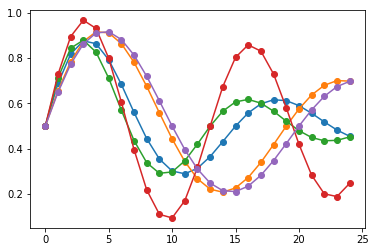

In [27]:
#test problem generation
X, y = generate_example(20, 5, 5)
for i in range(len(X)):
    pyplot.plot([x for x in X[i, :, 0]] + [x for x in y[i]], '-o')
pyplot.show()

In [28]:
#configure problem
length = 50
output = 5

In [29]:
# define model
model = Sequential()
model.add(LSTM(20, input_shape=(length, 1)))
model.add(Dense(output))
model.compile(loss='mae', optimizer='adam')
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 20)                1760      
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 105       
Total params: 1,865
Trainable params: 1,865
Non-trainable params: 0
_________________________________________________________________
None


In [34]:
#fit model
X, y = generate_example(length, 50000, output)
model.fit(X, y, batch_size=1, epochs=1)

Epoch 1/1
50000/50000 [==============================] - 2380s 48ms/step - loss: 0.0097


In [35]:
#evaluate model
X, y = generate_example(length, 1000, output)
loss = model.evaluate(X, y, verbose=0)
print('MAE: %f' % loss)

MAE: 0.002479


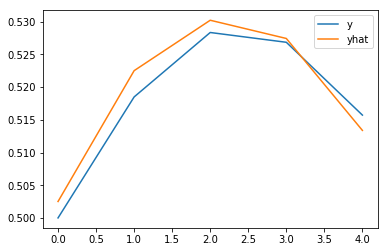

In [44]:
#prediction on new data
X, y = generate_example(length, 1, output)
yhat = model.predict(X, verbose=0)
pyplot.plot(y[0], label='y')
pyplot.plot(yhat[0], label='yhat')
pyplot.legend()
pyplot.show()